<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [40]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [41]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [42]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [43]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [45]:
# First get summary statistics of the dataset
print(boston_df.describe())

       Unnamed: 0        CRIM          ZN       INDUS        CHAS         NOX  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean   252.500000    3.613524   11.363636   11.136779    0.069170    0.554695   
std    146.213884    8.601545   23.322453    6.860353    0.253994    0.115878   
min      0.000000    0.006320    0.000000    0.460000    0.000000    0.385000   
25%    126.250000    0.082045    0.000000    5.190000    0.000000    0.449000   
50%    252.500000    0.256510    0.000000    9.690000    0.000000    0.538000   
75%    378.750000    3.677083   12.500000   18.100000    0.000000    0.624000   
max    505.000000   88.976200  100.000000   27.740000    1.000000    0.871000   

               RM         AGE         DIS         RAD         TAX     PTRATIO  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     6.284634   68.574901    3.795043    9.549407  408.237154   18.455534   
std      0.702617   28.1488

[Text(0.5, 1.0, 'Boxplot of Median value of owner-occupied homes'),
 Text(0, 0.5, 'Value $000s')]

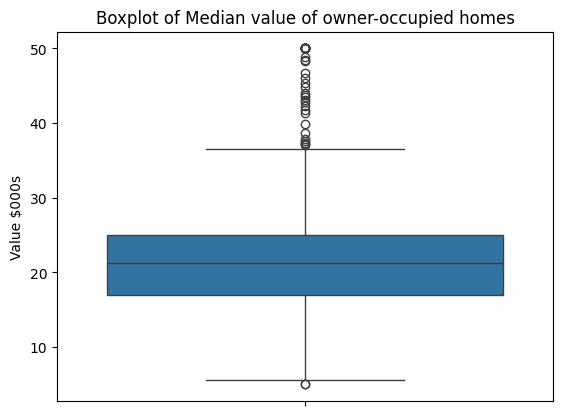

In [46]:
# Task 2a For the "Median value of owner-occupied homes" provide a boxplot
ax = sns.boxplot(y='MEDV', data=boston_df)
ax.set(title="Boxplot of Median value of owner-occupied homes", ylabel="Value $000s")

[Text(0.5, 1.0, 'Median value of owner-occupied homes bounded by Charles river or not'),
 Text(0.5, 0, 'Not bounded by river: 0     Bounded by river: 1'),
 Text(0, 0.5, 'Value $000s')]

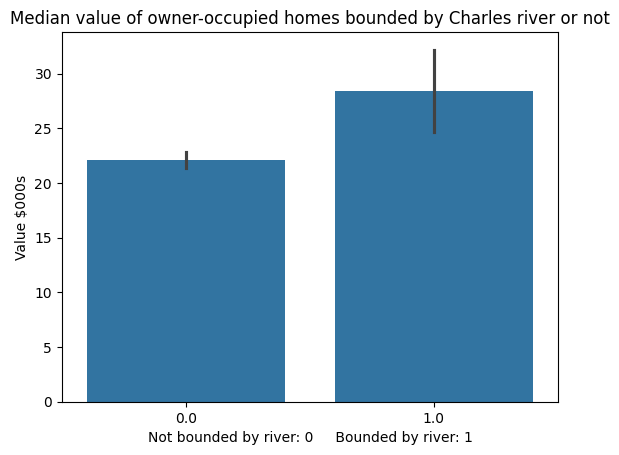

In [48]:
# Task 2b Provide a  bar plot for the Charles river variable
ax = sns.barplot(x="CHAS", y="MEDV", data=boston_df)
ax.set(title="Median value of owner-occupied homes bounded by Charles river or not", xlabel="Not bounded by river: 0     Bounded by river: 1", ylabel="Value $000s")

[Text(0.5, 1.0, 'Boxplots of Median value of owner-occupied homes by age'),
 Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Value $000s')]

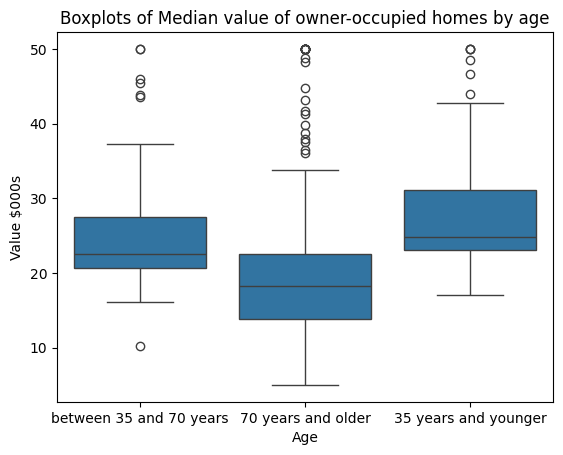

In [49]:
# Task 2c Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'
ax = sns.boxplot(x='age_group', y='MEDV', data=boston_df)
ax.set(title="Boxplots of Median value of owner-occupied homes by age", xlabel="Age", ylabel="Value $000s")

[Text(0.5, 1.0, 'Nitric oxide concentration vs proportion of non-retail business acres per town'),
 Text(0.5, 0, 'Proportion of non-retail business acres per town'),
 Text(0, 0.5, 'Nitric oxide concentration (parts per 10 million)')]

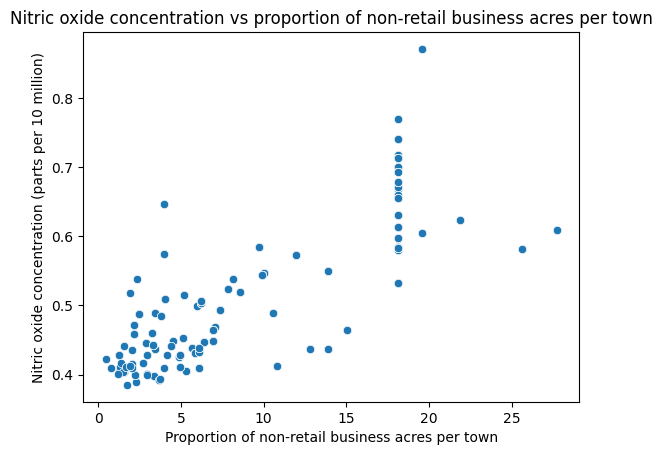

In [50]:
# Task 2d Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
ax = sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
ax.set(title="Nitric oxide concentration vs proportion of non-retail business acres per town", xlabel="Proportion of non-retail business acres per town", ylabel="Nitric oxide concentration (parts per 10 million)")

In [ ]:
# Conclusion: The Nitric oxide concentration increases as the proportion of non-retail business acres per town increases.

[Text(0.5, 1.0, 'Histogram of pupil to teach ratios by town'),
 Text(0.5, 0, 'Pupil to teacher ratio'),
 Text(0, 0.5, 'Number of towns')]

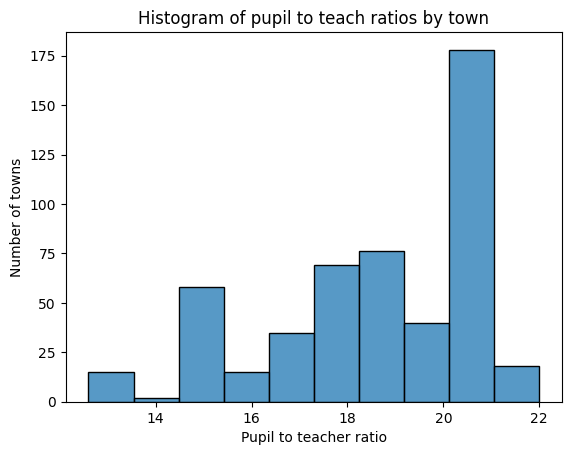

In [51]:
# Task 2e Create a histogram for the pupil to teacher ratio variable

ax = sns.histplot(x="PTRATIO", bins = 10, data=boston_df)
ax.set(title="Histogram of pupil to teach ratios by town", xlabel="Pupil to teacher ratio", ylabel="Number of towns")

In [52]:
# Task 3a Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

# State the hypothesis:
# H_0: µ_1=µ_2 ("there is no difference in median value of houses bounded by the Charles river or not")
# H_1: µ_1≠µ_2 ("there is a difference in median value of houses bounded by the Charles river or not")
# α = 0.05

#  Use T-test for independent samples:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'], boston_df[boston_df['CHAS'] == 1]['MEDV'])


TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

In [ ]:
# Conclusion: Since the p-value 7e-05 is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value of houses bounded by the Charles river or not.

In [53]:
# Task 3b Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

# We group the population data into three groups of 35 years and younger, between 35 and 70 years and 70 years and older

# State the hypothesis:
# H_0: µ_1=µ_2=µ_3 ("the three population MEDV means are equal")
# H_1: At least one of the means differ
# α = 0.05

# First we separate the three samples into a variable each:

thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

# Now we run a one-way ANOVA:

f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


In [ ]:
# Conclusion: Since the p-value 1.7e-15 is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in at least one of the means.

In [54]:
# Task 3c Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

# State the hypothesis:
# H_O Nitric oxide concentration is not correlated with proportion of non-retail business acres per town
# H_1 Nitric oxide concentration is correlated with proportion of non-retail business acres per town
# α = 0.05

# Since they are both continous variables we use a Pearson correlation test:

scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

In [ ]:
# Conclusion: Since the p-value 8e-98 is less than alpha value 0.05, we reject the null hypothesis and conclude that there exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

[Text(0.5, 1.0, 'Median value of owner occupied homes by weighted distance to the five Boston employment centres'),
 Text(0.5, 0, 'Weighted distance to the five Boston employment centres'),
 Text(0, 0.5, 'Value $000s')]

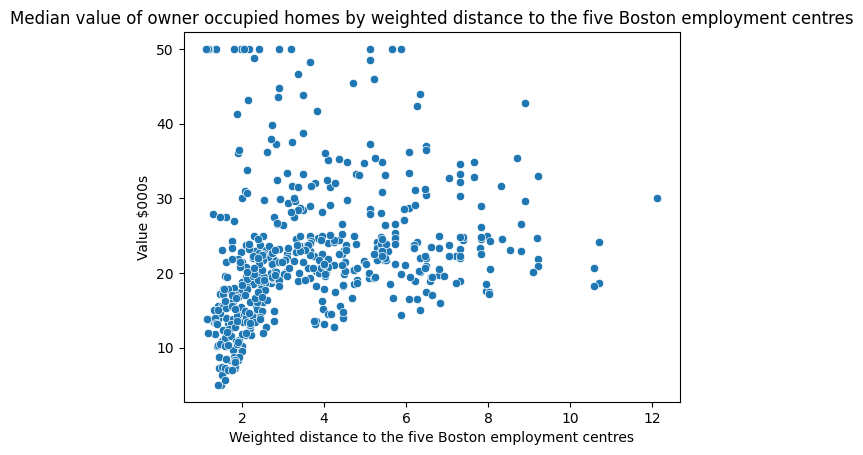

In [55]:
# Task 3d What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

# First we provide a scatter plot to show the relationship between weighted distance to the five Boston employment centres and the median value of owner occupied homes.
ax = sns.scatterplot(x='DIS', y='MEDV', data=boston_df)
ax.set(title="Median value of owner occupied homes by weighted distance to the five Boston employment centres", xlabel="Weighted distance to the five Boston employment centres", ylabel="Value $000s")

In [56]:
# Task 3d What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

# We perform regression analysis:

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 10 Oct 2024   Prob (F-statistic):           1.21e-08
Time:                        11:33:13   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Conclusion: The impact of an additional weighted distance to the five Boston employment centres is an increase of $1,092 on the median value of owner occupied homes.